<a href="https://colab.research.google.com/github/maanyathakur/cifar10-alexnet-vs-mobilenet/blob/main/CIFAR_10_%3E_AlexNet_VS_MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, DepthwiseConv2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
alexnet = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

alexnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
alexnet.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,688,970 (21.70 MB)

 Trainable params: 5,687,562 (21.70 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [3]:
mobilenet_like = Sequential([
    Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),

    DepthwiseConv2D((3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (1, 1), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    DepthwiseConv2D((3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (1, 1), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    DepthwiseConv2D((3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (1, 1), padding='same', activation='relu'),
    GlobalAveragePooling2D(),

    Dense(10, activation='softmax')
])

mobilenet_like.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_like.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 32, 32, 32)     │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 16, 16, 64)     │           640 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 8, 8, 128)      │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 256)      │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,186 (196.04 KB)

 Trainable params: 49,674 (194.04 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

print("Training AlexNet-like Model...")
alexnet_history = alexnet.fit(x_train, y_train_cat, validation_split=0.2, epochs=50, batch_size=128, callbacks=[early_stop])

print("\nTraining MobileNet-like Model...")
mobilenet_history = mobilenet_like.fit(x_train, y_train_cat, validation_split=0.2, epochs=50, batch_size=128, callbacks=[early_stop])


Training AlexNet-like Model...
Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.3028 - loss: 2.3257 - val_accuracy: 0.1221 - val_loss: 2.6250
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5337 - loss: 1.3096 - val_accuracy: 0.4731 - val_loss: 1.3778
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6360 - loss: 1.0462 - val_accuracy: 0.6118 - val_loss: 1.1245
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.7033 - loss: 0.8484 - val_accuracy: 0.6661 - val_loss: 1.0037
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7547 - loss: 0.7159 - val_accuracy: 0.7244 - val_loss: 0.8189
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7929 - loss: 0.6072 - val_accuracy: 0.7034 - val_loss: 0.8762
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8243 - loss: 0.5125 - val_accuracy: 0.7058 - val_loss: 0.9508
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy

In [5]:
alex_pred = np.argmax(alexnet.predict(x_test), axis=1)
mobile_pred = np.argmax(mobilenet_like.predict(x_test), axis=1)

print("=== AlexNet-like Classification Report ===")
print(classification_report(y_test, alex_pred, target_names=class_names))

print("\n=== MobileNet-like Classification Report ===")
print(classification_report(y_test, mobile_pred, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
=== AlexNet-like Classification Report ===
              precision    recall  f1-score   support

    airplane       0.75      0.82      0.79      1000
  automobile       0.89      0.87      0.88      1000
        bird       0.73      0.58      0.65      1000
         cat       0.49      0.79      0.60      1000
        deer       0.84      0.67      0.74      1000
         dog       0.74      0.62      0.68      1000
        frog       0.94      0.71      0.81      1000
       horse       0.80      0.84      0.82      1000
        ship       0.86      0.87      0.86      1000
       truck       0.83      0.88      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.79      0.77      0.77     10000
weighted avg       0.79      0.77      0.77     10000


=== MobileNet-like Classification Report ===
              precision    recall  f1-score   support

    airplane   

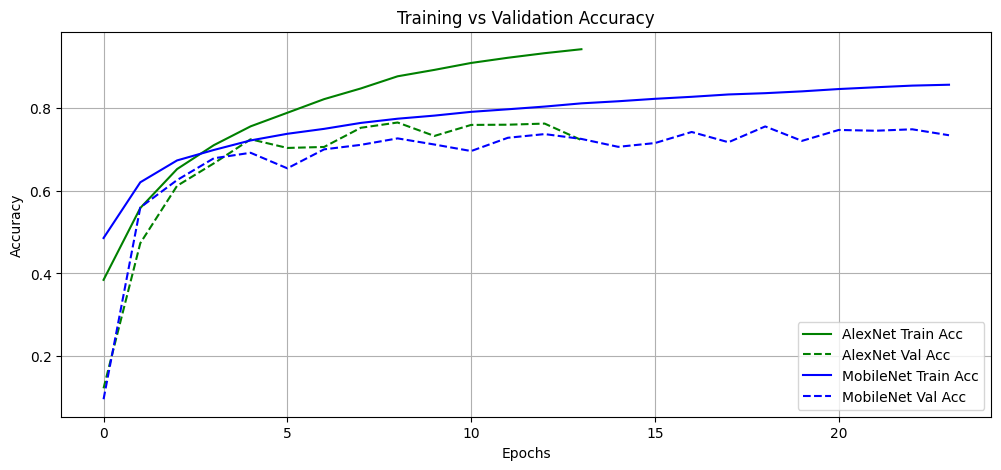

In [6]:
plt.figure(figsize=(12,5))

plt.plot(alexnet_history.history['accuracy'], label='AlexNet Train Acc', color='green')
plt.plot(alexnet_history.history['val_accuracy'], label='AlexNet Val Acc', linestyle='--', color='green')

plt.plot(mobilenet_history.history['accuracy'], label='MobileNet Train Acc', color='blue')
plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNet Val Acc', linestyle='--', color='blue')

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


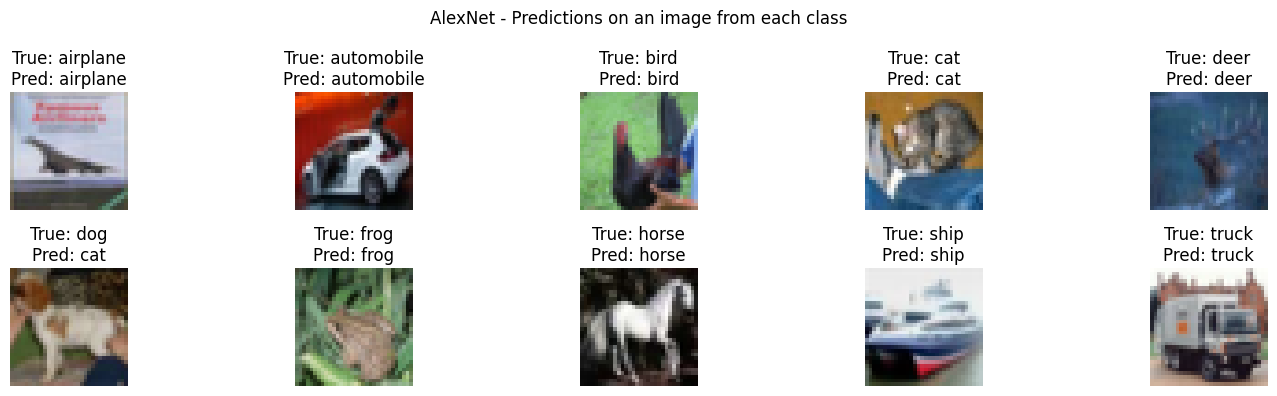

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


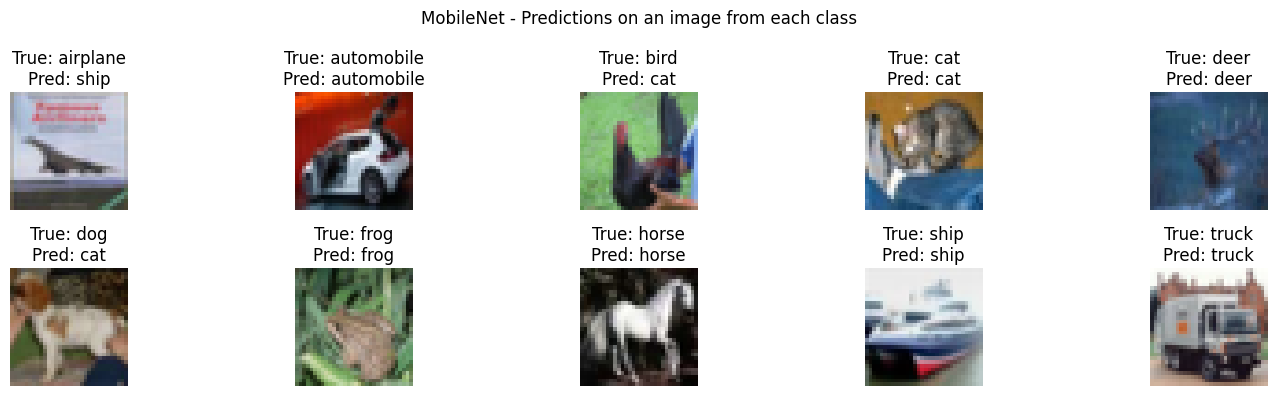

In [9]:
def display_predictions(model, x_test, y_test, name="Model"):
    indices = []
    for i in range(10):
        idx = np.where(y_test == i)[0][0]
        indices.append(idx)

    images = x_test[indices]
    labels = y_test[indices]
    preds = np.argmax(model.predict(images), axis=1)

    plt.figure(figsize=(15, 4))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_names[labels[i][0]]}\nPred: {class_names[preds[i]]}")
        plt.axis('off')
    plt.suptitle(f"{name} Predictions on an image from each class")
    plt.tight_layout()
    plt.show()

display_predictions(alexnet, x_test, y_test, "AlexNet -")
display_predictions(mobilenet_like, x_test, y_test, "MobileNet -")
